In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib

In [12]:
from matplotlib.image import imread


# Segmentación de imágenes
Segmentación de imágenes es la tarea de particionar la imagenes en multiples segmentos, algunos ejemplos son:
- *Segmentación semantica*, todos los pixeles que forman parte del mismo tipo de objeto son asignadas al mismo segmento.
- En *segmentación de instancia*, todos los pixeles que son partes del mismo objeto individual son asignadas al mismo segmento.
![Image segmentation](https://storage.googleapis.com/coderzcolumn/static/tutorials/artificial_intelligence/instance_semantic_segmentation.jpg)
En el siguiente ejemplo vamos a ver un problema de *segmentación de color*. 

In [13]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png', 'ladybug.png')


('ladybug.png', <http.client.HTTPMessage at 0x7f0e2450fe50>)

(533, 800, 3)

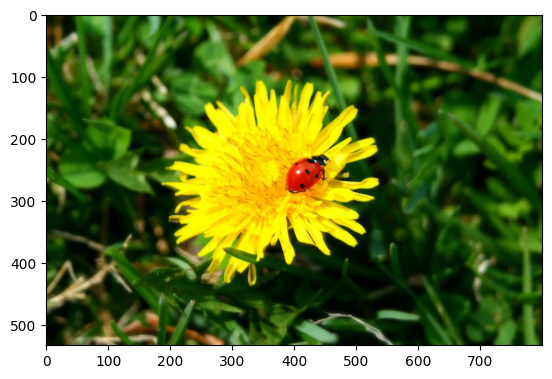

In [14]:
image = imread('ladybug.png')
plt.imshow(image)
image.shape


In [15]:
X = image.reshape(-1, 3)
X.shape


(426400, 3)

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]#le asigno como color el centroide del cluster
segmented_img = segmented_img.reshape(image.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
kmeans.cluster_centers_

array([[0.98364216, 0.9359353 , 0.02574798],
       [0.02286464, 0.1107755 , 0.00577724],
       [0.21914873, 0.38675722, 0.05800801],
       [0.7576767 , 0.2122922 , 0.04460662],
       [0.09998584, 0.25428283, 0.01694912],
       [0.6126595 , 0.6301019 , 0.3875087 ],
       [0.37211913, 0.52359784, 0.15730184],
       [0.8845901 , 0.7256055 , 0.03442024]], dtype=float32)

In [18]:
image.shape

(533, 800, 3)

Text(0.5, 1.0, 'Segmented image')

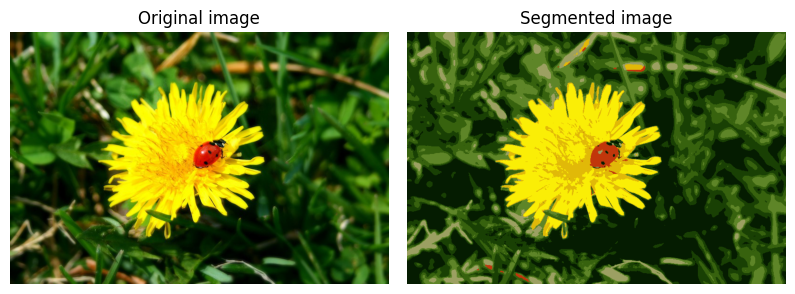

In [19]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
plt.imshow(segmented_img)
plt.axis('off')
plt.title("Segmented image")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

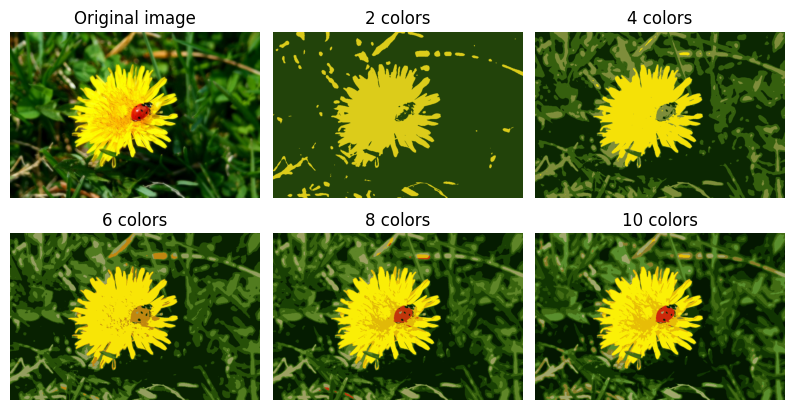

In [20]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate([2,4,6,8,10]):
    plt.subplot(232 + idx)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    plt.imshow(segmented_img)
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

# Usando Clustering para preprocesar
Los algoritmos de clusterización pueden ser utilizados como reductores de dimensionalidad. Veamos un ejemplos:

In [21]:
from sklearn.datasets import load_digits

In [22]:
X, y = load_digits(return_X_y=True)

In [24]:
X.shape

(1797, 64)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
from matplotlib.axis import XAxis
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr",max_iter=5000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [27]:
log_reg.score(X_test,y_test)

0.9466666666666667

Ahora usemos clusterización para atacar este problema

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans',KMeans(n_clusters=50,n_init=10,random_state=0)),
    ('log_reg',LogisticRegression(multi_class="ovr",max_iter=5000,random_state=0)),
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=10, random_state=0)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=0))])

In [ ]:
pipeline.score(X_test,y_test)

0.9666666666666667

podriamos aplicar gridsearch sobre el hiperparámetro *k* del algoritmo K means

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(10, 200,10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END ..............................kmeans__n_clusters=10; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=10; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=10; total time=   1.0s
[CV] END ..............................kmeans__n_clusters=20; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=20; total time=   2.8s
[CV] END ..............................kmeans__n_clusters=20; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=30; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=30; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=30; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=40; total time=   6.2s
[CV] END ..............................kmeans__n_clusters=40; total time=   4.1s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init=10,
                                               random_state=0)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=0))]),
             param_grid={'kmeans__n_clusters': range(10, 200, 10)}, verbose=2)

In [ ]:
grid_clf.cv_results_

{'mean_fit_time': array([1.39966416, 2.86084445, 4.43373473, 5.51147827, 5.14576594,
        5.22288497, 5.83633455, 6.59441304, 5.83778318, 6.28262011,
        6.25412782, 6.40499218, 7.73503828, 6.95545697, 6.48306084,
        6.6039749 , 6.45695543, 7.32117248, 6.56362883]),
 'std_fit_time': array([0.28921315, 0.18103288, 0.97474859, 0.99286801, 1.21130838,
        0.91469951, 0.78608914, 1.08932293, 0.94904074, 0.17968794,
        0.35785002, 0.79999373, 0.96960575, 1.01705491, 1.05902538,
        0.68667308, 0.36074165, 1.08067845, 0.90349648]),
 'mean_score_time': array([0.00375962, 0.00238601, 0.00309777, 0.00256467, 0.00252668,
        0.00345437, 0.00269357, 0.00273625, 0.00285474, 0.00513458,
        0.00429447, 0.00395966, 0.00482265, 0.00324408, 0.00337362,
        0.00465568, 0.00473046, 0.0035789 , 0.00367157]),
 'std_score_time': array([2.21868718e-03, 4.74436332e-05, 9.82647566e-04, 1.55604977e-04,
        3.83917255e-05, 1.20034528e-03, 1.32850480e-05, 3.62753344e-05,


In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 170}

In [ ]:
grid_clf.score(X_test,y_test)

0.98

# Clustering para aprendizaje semi-supervisado
puede darse el caso que tengamos muy pocas instancias etiquetadas, como en el siguiente ejemplo:

In [ ]:
#si tenemos solo 50 imageens etiquetasdas
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr",max_iter=5000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(max_iter=5000, multi_class='ovr')

In [ ]:
log_reg.score(X_test,y_test)

0.82

En vez de considerar imágenes al azar tomemos 50 imágenes representativas.

In [ ]:
k = 50 # imagenes representativas
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)#devuelve la distancia a cada centroide
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_representative_digits.shape,y_representative_digits.shape,

((50, 64), (50,))

In [ ]:
log_reg = LogisticRegression(multi_class="ovr",max_iter=5000)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.8933333333333333

Podríamos hacer un propagación de etiquetas (*label propagation*):

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr",max_iter=5000)
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

0.9422222222222222

Por último podríamos pensar que el punto anterior puede verse afectado por las instancias que están al borde que no están bien identificadas.

In [ ]:
for percentile_closest in np.arange(5,101,5):

  X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
  for i in range(k):
      in_cluster = (kmeans.labels_ == i)
      cluster_dist = X_cluster_dist[in_cluster]
      cutoff_distance = np.percentile(cluster_dist, percentile_closest)
      above_cutoff = (X_cluster_dist > cutoff_distance)
      X_cluster_dist[in_cluster & above_cutoff] = -1
  partially_propagated = (X_cluster_dist != -1)
  X_train_partially_propagated = X_train[partially_propagated]
  y_train_partially_propagated = y_train_propagated[partially_propagated]
  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
  LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)
  print(f'percetile {int(percentile_closest)}%: ',log_reg.score(X_test, y_test))

percetile 5%:  0.9022222222222223
percetile 10%:  0.9311111111111111
percetile 15%:  0.9377777777777778
percetile 20%:  0.94
percetile 25%:  0.9377777777777778
percetile 30%:  0.94
percetile 35%:  0.94
percetile 40%:  0.9422222222222222
percetile 45%:  0.94
percetile 50%:  0.9333333333333333
percetile 55%:  0.9311111111111111
percetile 60%:  0.9333333333333333
percetile 65%:  0.9355555555555556
percetile 70%:  0.9377777777777778
percetile 75%:  0.9488888888888889
percetile 80%:  0.9533333333333334
percetile 85%:  0.9511111111111111
percetile 90%:  0.9466666666666667
percetile 95%:  0.9444444444444444
percetile 100%:  0.9422222222222222


# Active learning
El aprendizaje activo es cuando el que un algoritmo de aprendizaje puede consultar de forma interactiva a un usuario experto para etiquetar nuevos puntos de datos con los resultados deseados.\
Una de las estrategias más comunes a seguir se denomina *uncertainty sampling*, que consiste en los siguientes pasos:
1. El modelo se entrena con las instancias etiquetadas hasta el momento y se utiliza para hacer una predicción sobre todas las instancias sin etiquetas.
2. Las instancias con más incertezas son dadas al experto para ser etiquetadas.
3. Se repite el proceso hasta que no se perciba mejora notable en el entrenamiento.